In [2]:
import yaml

with open('../params.yaml', 'r') as file:
    param = yaml.safe_load(file)
    XGBRegressorModelParams = param['XGBRegressorModelParams']
    DNNModelParams = param['DNN_model_params']
    preprocessingParam = param['preprocessing']
    LSTMpreprocessing = param['LSTMpreprocessing']
    LSTM_model_params = param['LSTM_model_params']

/Users/xgxtphg/Documents/git/CaseStudiesOfAIImplementation/src/loadData.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['electricLoad'] = df['electricLoad'].astype(float)


Ergebnisse des Dickey-Fuller-Tests:
Test Statistik                  -1.107296e+01
p-Wert                           4.505271e-20
#Lags Used                       6.500000e+01
Anzahl der Beobachtungen Used    8.410200e+04
Critical Value (1%)             -3.430428e+00
Critical Value (5%)             -2.861574e+00
Critical Value (10%)            -2.566788e+00
dtype: float64


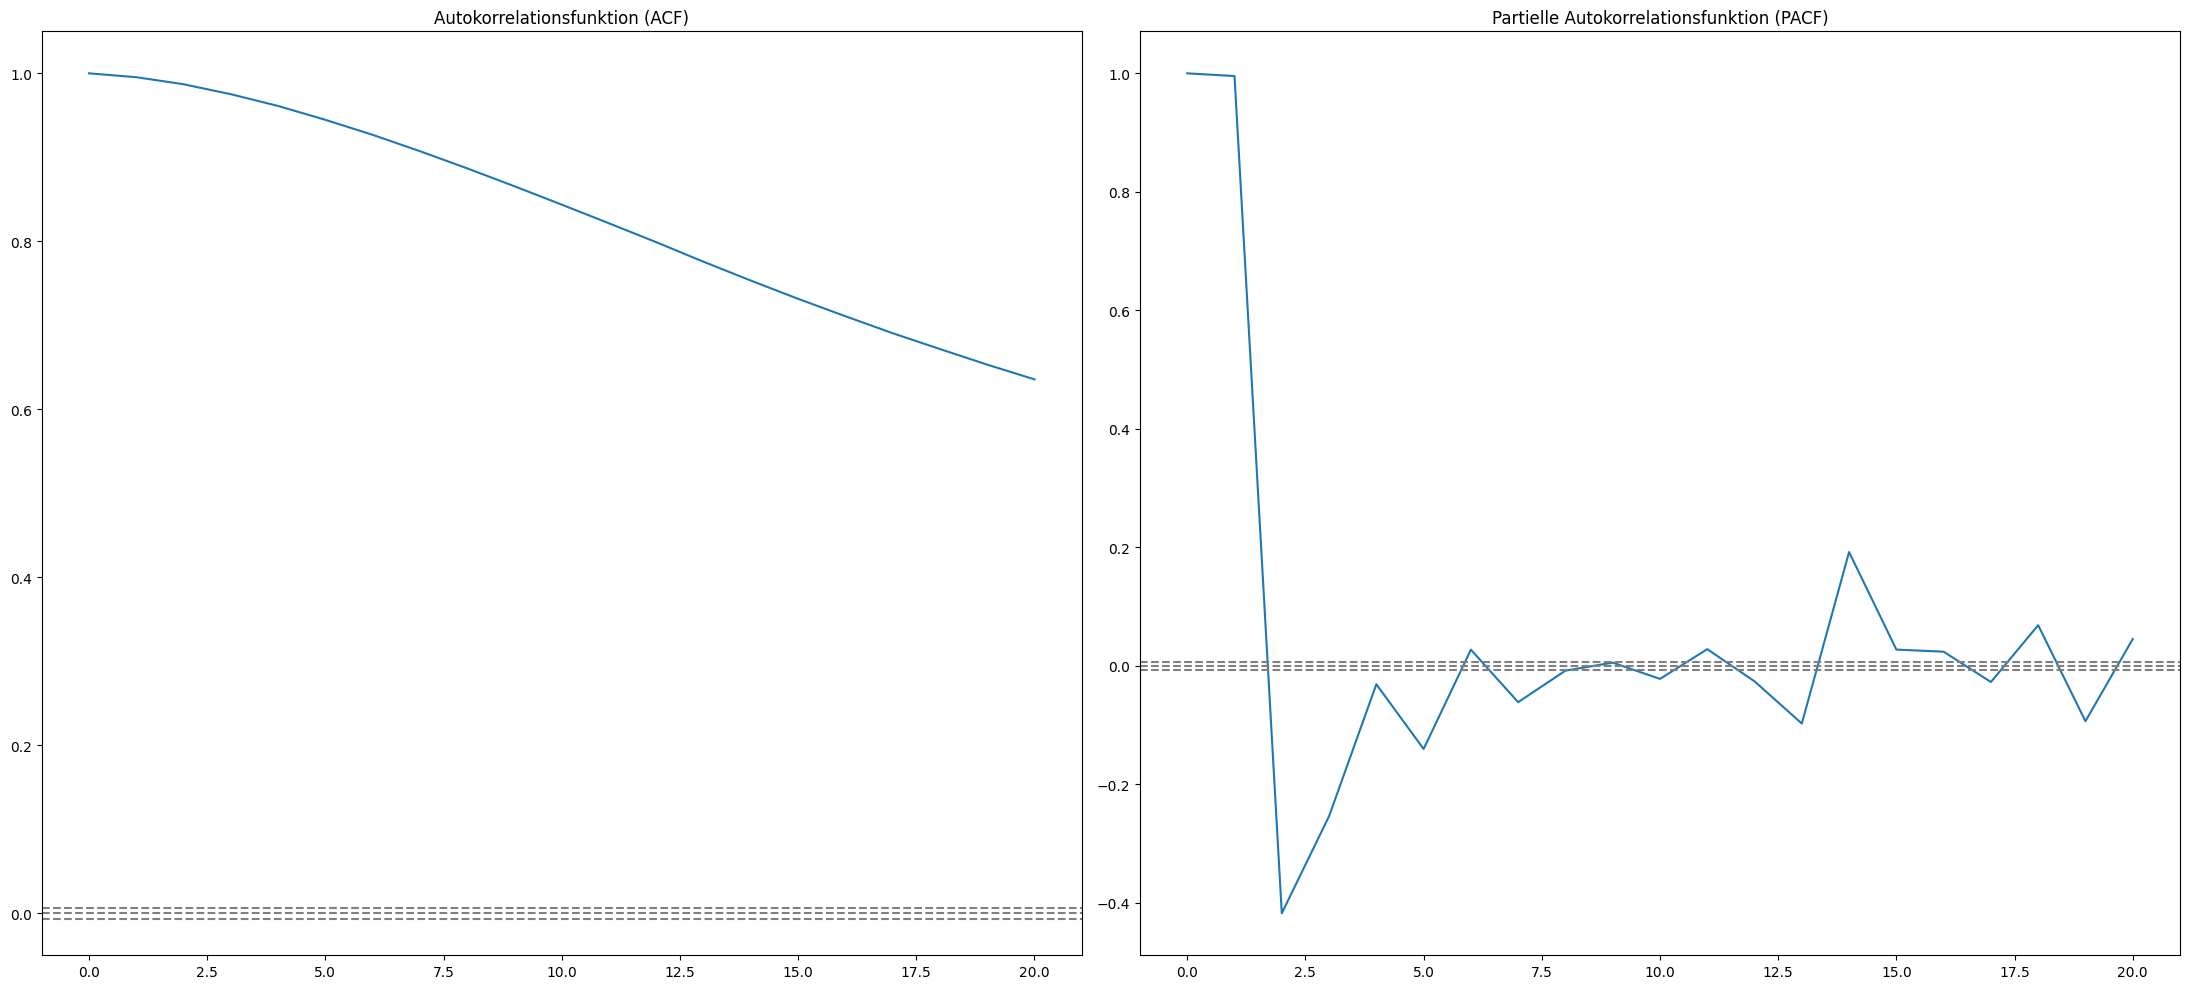

In [4]:
from src.train import preprocessingParam
from src.preprocessing import preprocessingXGBoost
from src.loadData import getData
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf, adfuller
from matplotlib import pyplot as plt

# Laden der Daten
data = getData(param['dataset'])
xTest, yTest, xTrain, yTrain = preprocessingXGBoost(data, **preprocessingParam)

# ADF-Test zur Bestimmung von 'd'
print("Ergebnisse des Dickey-Fuller-Tests:")
dftest = adfuller(yTrain, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistik', 'p-Wert', '#Lags Used', 'Anzahl der Beobachtungen Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

# ACF- und PACF-Plots zur Bestimmung von 'p' und 'q'
lag_acf = acf(yTrain, nlags=20)
lag_pacf = pacf(yTrain, nlags=20, method='ols')

# ACF-Plot
plt.figure(figsize=(22, 10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(yTrain)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(yTrain)), linestyle='--', color='gray')
plt.title('Autokorrelationsfunktion (ACF)')

# PACF-Plot
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(yTrain)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(yTrain)), linestyle='--', color='gray')
plt.title('Partielle Autokorrelationsfunktion (PACF)')
plt.tight_layout()

plt.show()
